In [5]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter

dataset = pd.read_csv('/Users/eddie/Downloads/Agriculture Data.xlsx - Sheet1 (1).csv')

X = pd.DataFrame(dataset.iloc[:,:11].values)
Y = pd.DataFrame(dataset.iloc[:,11:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
oversample = SMOTE(random_state=42)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
counter = Counter(Y)
print(counter)

print(X_train.shape)
print(Y_train.shape)

features = pd.DataFrame(dataset.iloc[:,:16])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10
0      1   1   2  84  27   2   0   1   0   0   0
1      1   1   2  54  25   9   0   0   0   0   0
2      1   1   2  41  41   2   1   0   0   0   0
3      3   3   2  64  34   9   0   0   0   0   0
4      3   1   2  22  13   9   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2482   1   1   1  50  25   9   0   0   0   0   0
2483   1   2   1  58  49   8   0   0   0   0   0
2484   1   2   1   3  36   9   0   0   0   0   0
2485   3   2   2  48  40   9   0   0   0   0   0
2486   1   1   1  81  37   7   0   0   0   0   0

[2487 rows x 11 columns]
      0
0     0
1     0
2     1
3     1
4     1
...  ..
2482  1
2483  0
2484  1
2485  0
2486  1

[2487 rows x 1 columns]
Counter({0: 1})
(2778, 11)
(2778, 1)
Index(['Location of Incident', 'Time', 'Gender', 'Age', 'State',
       'Injury Agent ', 'Confined Space', 'Grain Involved', 'Alcohol/Drugs',
       'Seatbelt', 'Helmet', 'Fatal'],
      dtype='object')


In [6]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

In [7]:
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
from sklearn.metrics import roc_auc_score

In [8]:
def objective(n_estimators, max_depth, min_samples_split, max_features):
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                  max_depth=int(max_depth),
                                  min_samples_split=int(min_samples_split),
                                  max_features=min(max_features, 0.999),  # Fraction, must be <= 1.0
                                  random_state=42)
    
    return cross_val_score(model, X_train, Y_train, cv=10,scoring = 'roc_auc').mean()
param_bounds = {
    'n_estimators': (10, 250),
    'max_depth': (1, 100),
    'min_samples_split': (2, 50),
    'max_features': (0.1, 0.999),
}
optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=5)
best_params = optimizer.max['params']


|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 1         | 0.7464    | 38.08     | 0.9547    | 37.14     | 153.7     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 2         | 0.7916    | 16.45     | 0.2402    | 4.788     | 217.9     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 3         | 0.7839    | 60.51     | 0.7366    | 2.988     | 242.8     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 4         | 0.7797    | 83.41     | 0.2909    | 10.73     | 54.02     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 5         | 0.7634    | 31.12     | 0.5718    | 22.73     | 79.89     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 6         | 0.7863    | 14.49     | 0.526     | 2.0       | 250.0     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 7         | 0.7822    | 15.8      | 0.9075    | 2.536     | 219.6     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 8         | 0.7826    | 17.9      | 0.1       | 9.853     | 214.0     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 9         | 0.7455    | 11.15     | 0.1       | 5.22      | 213.7     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionW

| 10        | 0.7842    | 19.0      | 0.6999    | 6.734     | 217.8     |


In [9]:
model = RandomForestClassifier(n_estimators=int(best_params['n_estimators']),
                                   max_depth=int(best_params['max_depth']),
                                   min_samples_split=int(best_params['min_samples_split']),
                                   max_features=best_params['max_features'],
                                   random_state=42)
model.fit(X_train,Y_train)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=16, max_features=0.24023907378224618,
                       min_samples_split=4, n_estimators=217, random_state=42)

In [10]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0
 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1
 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0
 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 0 1 1 

[[ 68  91]
 [ 97 242]]


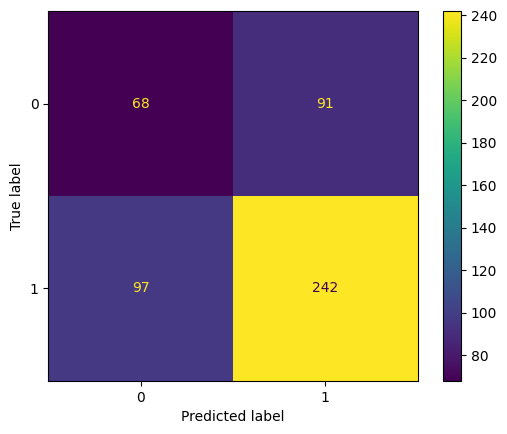

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
print(confusionmatrix)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1])
cm_display.plot()

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 499it [05:50,  1.39it/s]                         


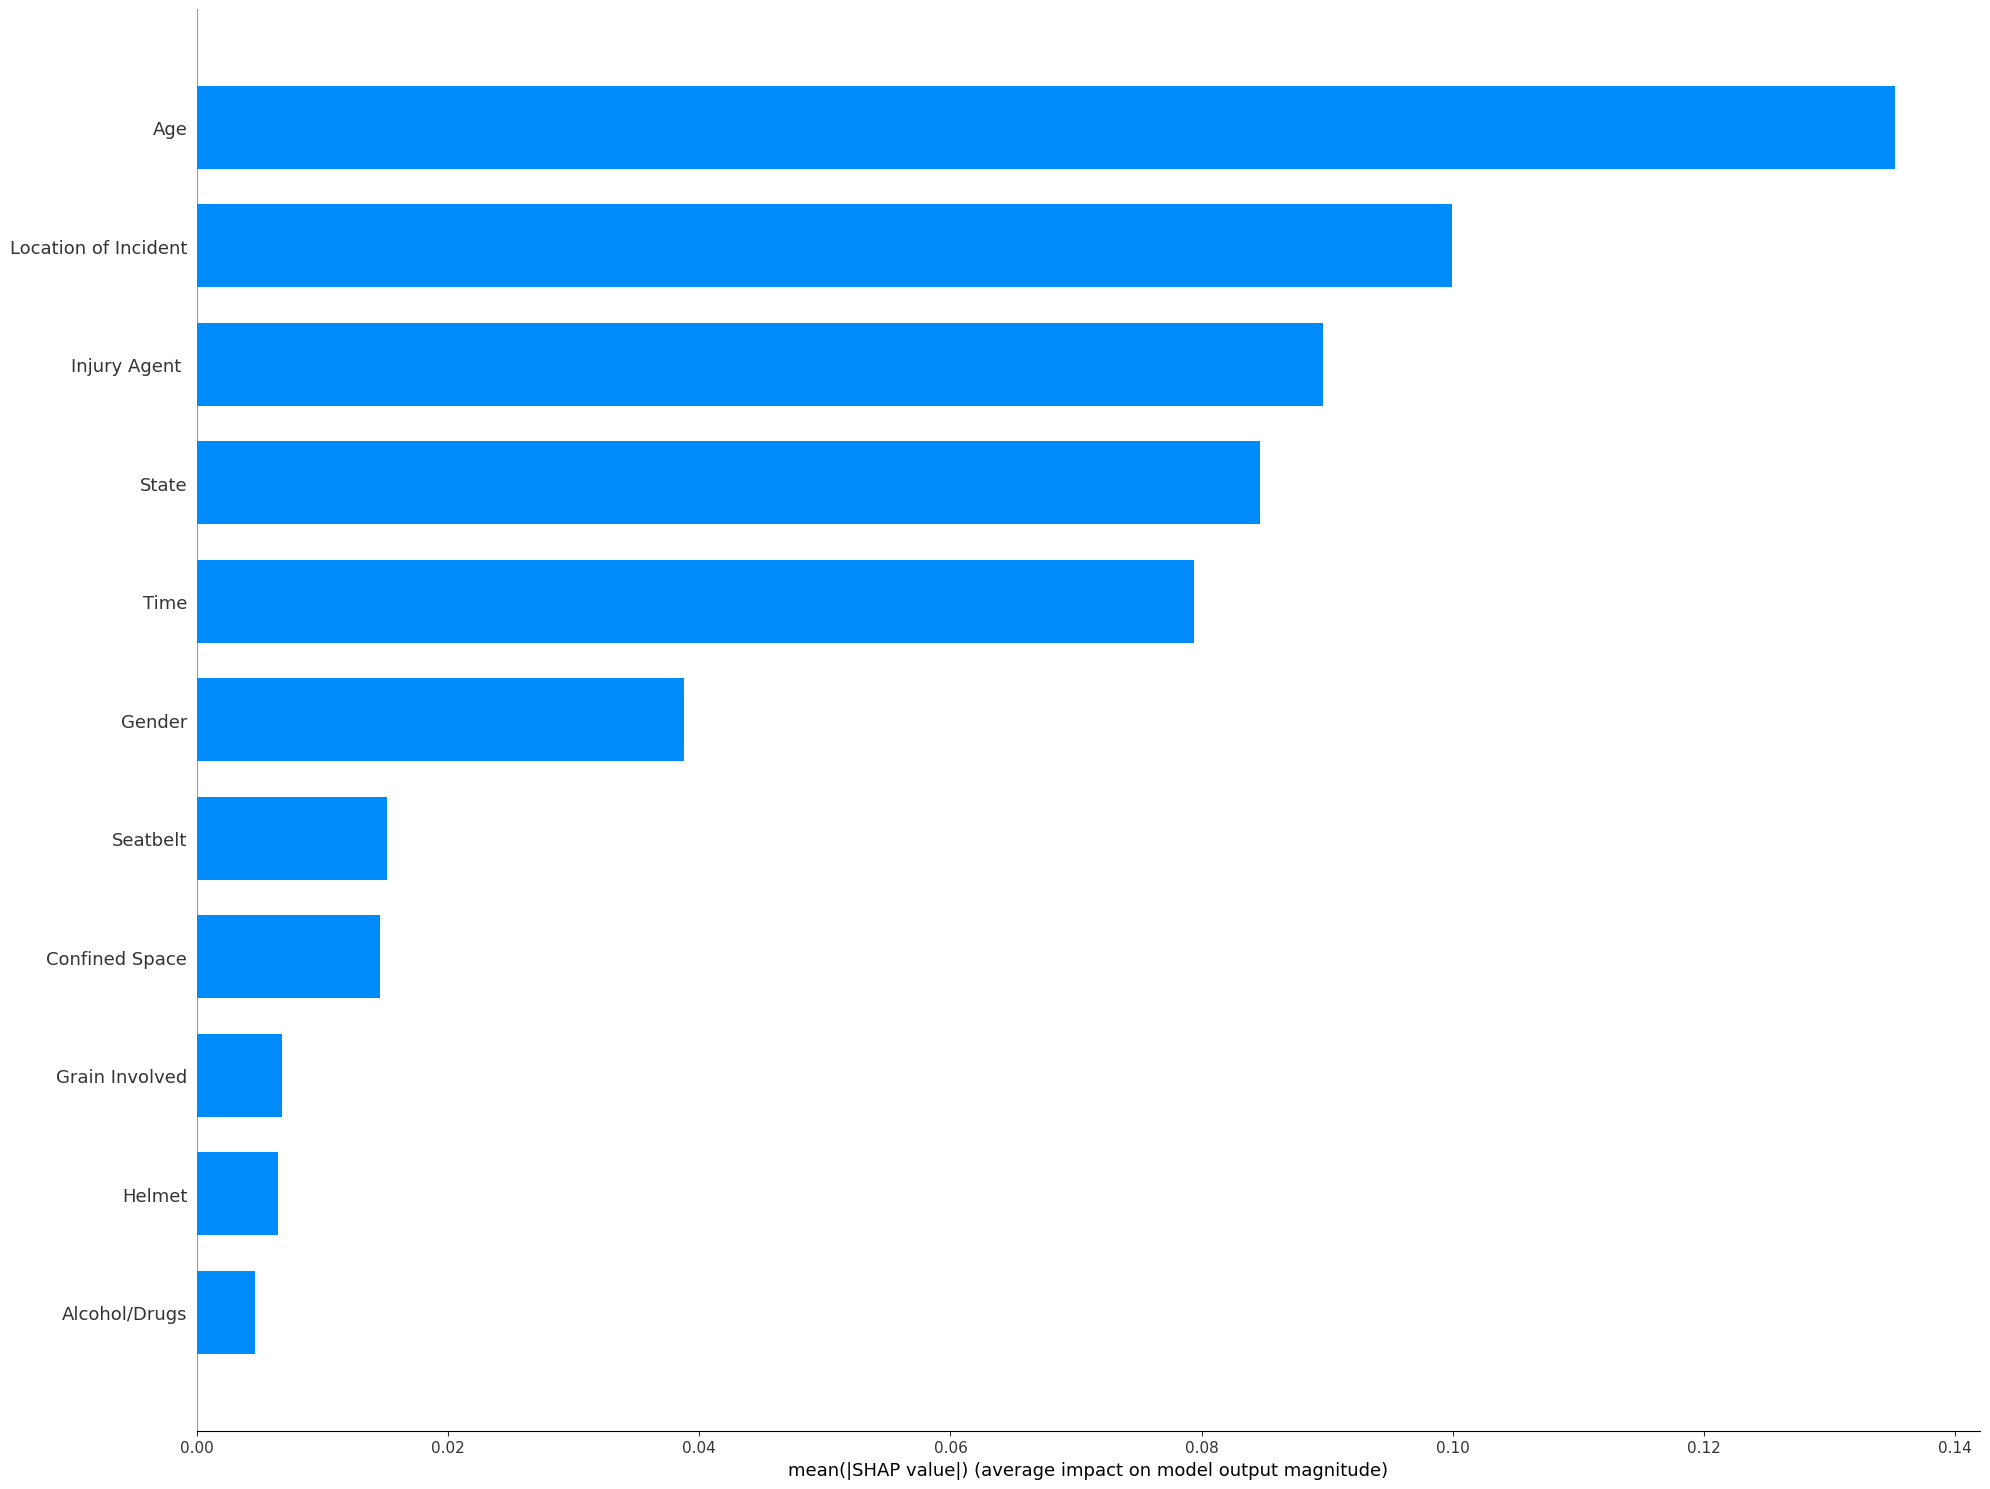

In [12]:
import shap 
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

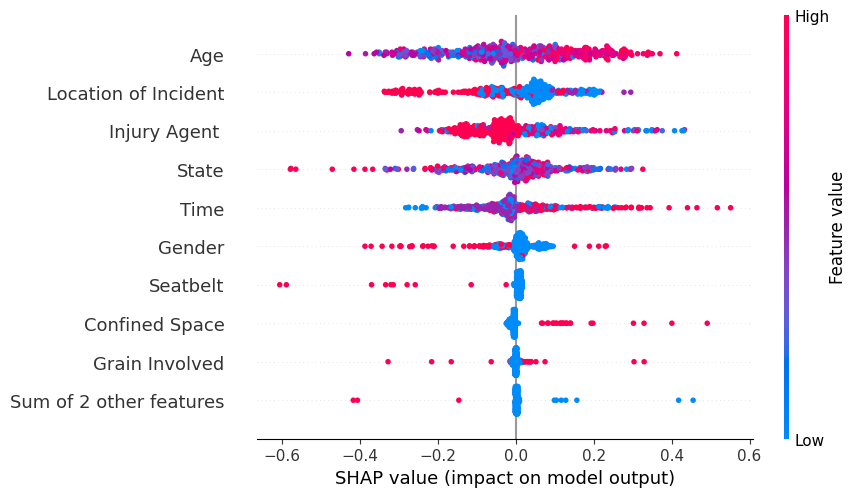

In [13]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)